In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np



Using TensorFlow backend.


In [2]:
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

In [3]:
dataset = io.loadmat('Data_hoda_full.mat')

In [4]:
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

In [5]:
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

In [6]:
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [7]:
print ("\tx_train.shape: {}".format(np.shape(X_train)))

	x_train.shape: (1000, 25)


In [9]:
model = Sequential()



model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))
model.add(Dense(64, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                704       
Total params: 3,018
Trainable params: 3,018
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [11]:
x_train = np.array(X_train)
x_test = np.array(X_test)
'''3.2 normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test  = keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
# 5. Define model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

Test Accuracy: 0.9150000214576721 
Maximum Test Acuracy During Training:  0.925000011920929


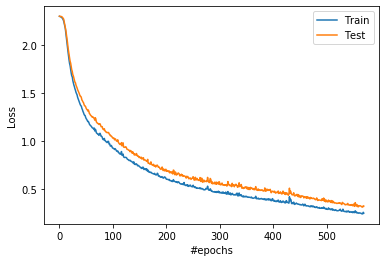

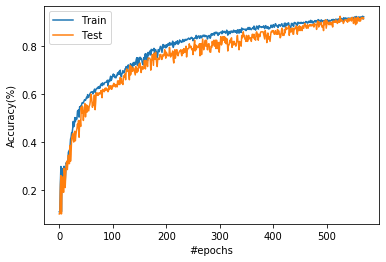

In [18]:
for i in range(400):
    # 7. Fit model on training data
    model.fit(x_train, y_train,
              epochs=1,
              batch_size=64, verbose=0)

    # 8. Evaluate model on test data
    loss, acc = model.evaluate(x_train, y_train, verbose=0)
    train_loss += [loss]
    train_acc += [acc]
    loss, acc = model.evaluate(x_test, y_test, verbose=0)
    test_loss += [loss]
    test_acc += [acc]
print("Test Accuracy:",test_acc[-1],"\nMaximum Test Acuracy During Training: ", max(test_acc))

plt.figure(1)
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(train_acc, label='Train')
plt.plot(test_acc, label='Test')
plt.xlabel('#epochs')
plt.ylabel('Accuracy(%)')
plt.legend()
plt.show()